In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score



In [ ]:
df=pd.read_csv('heart_failure_clinical_records.csv')

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


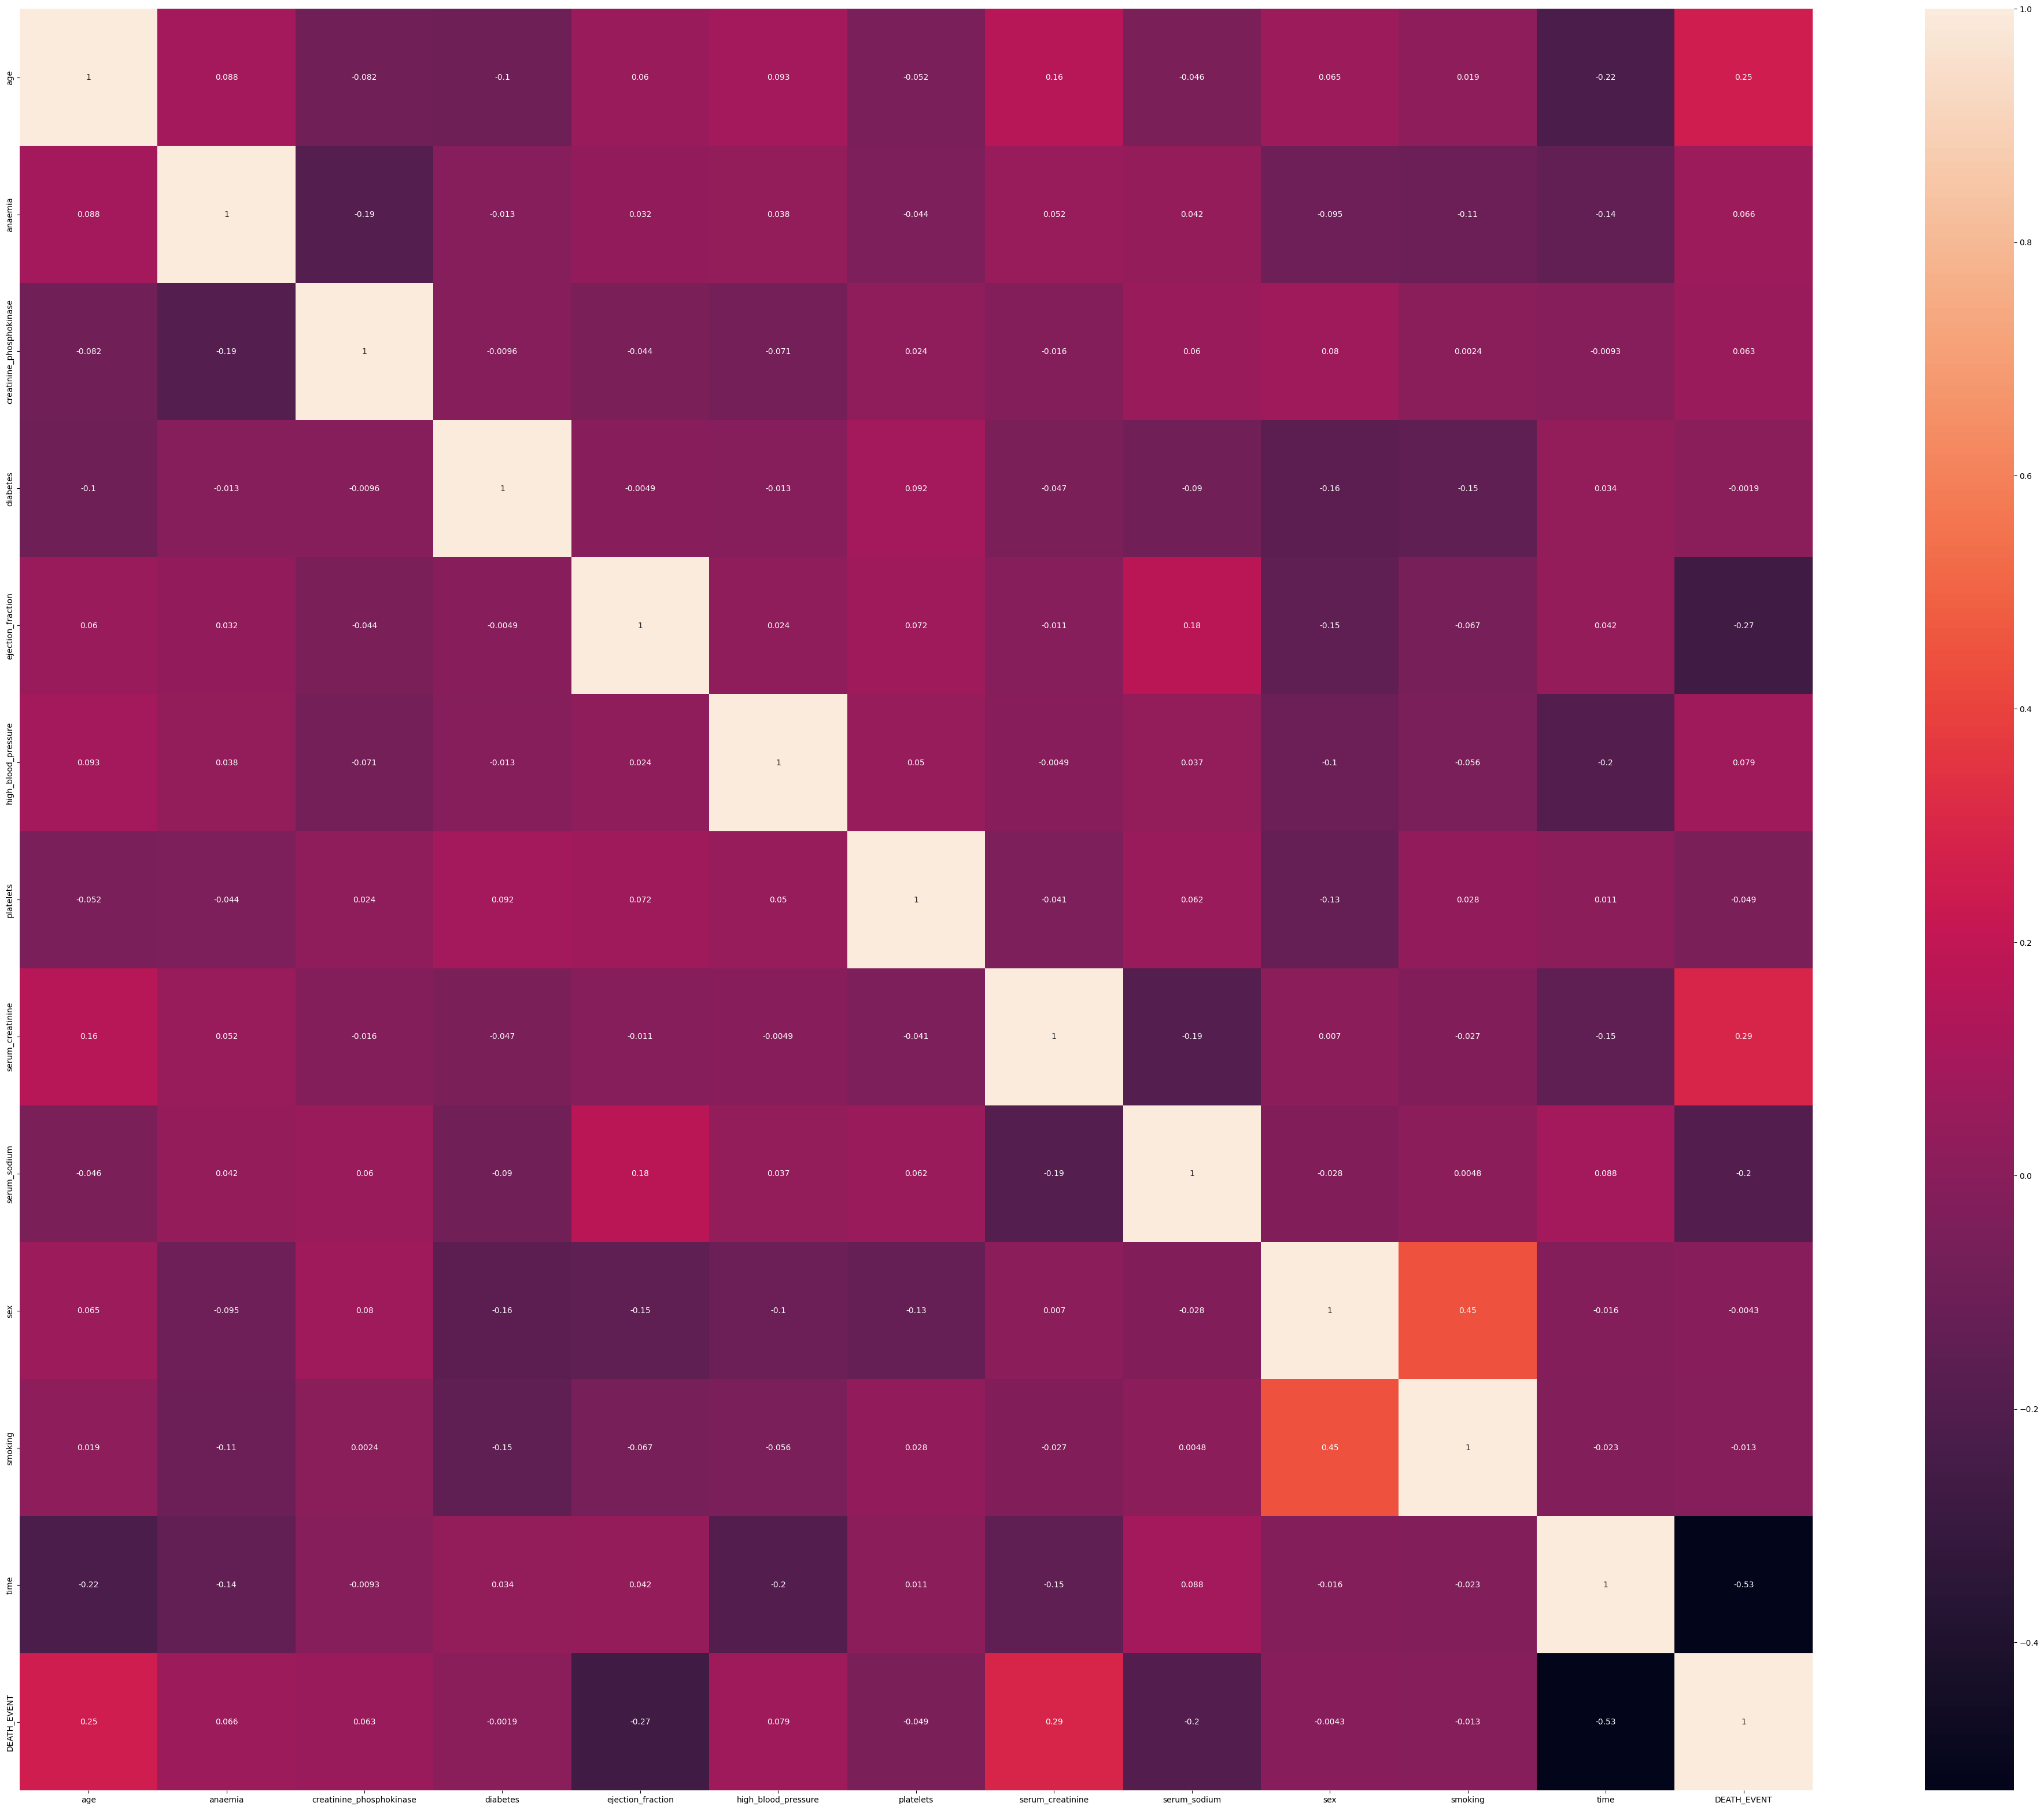

In [ ]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(),annot=True)
plt.show()

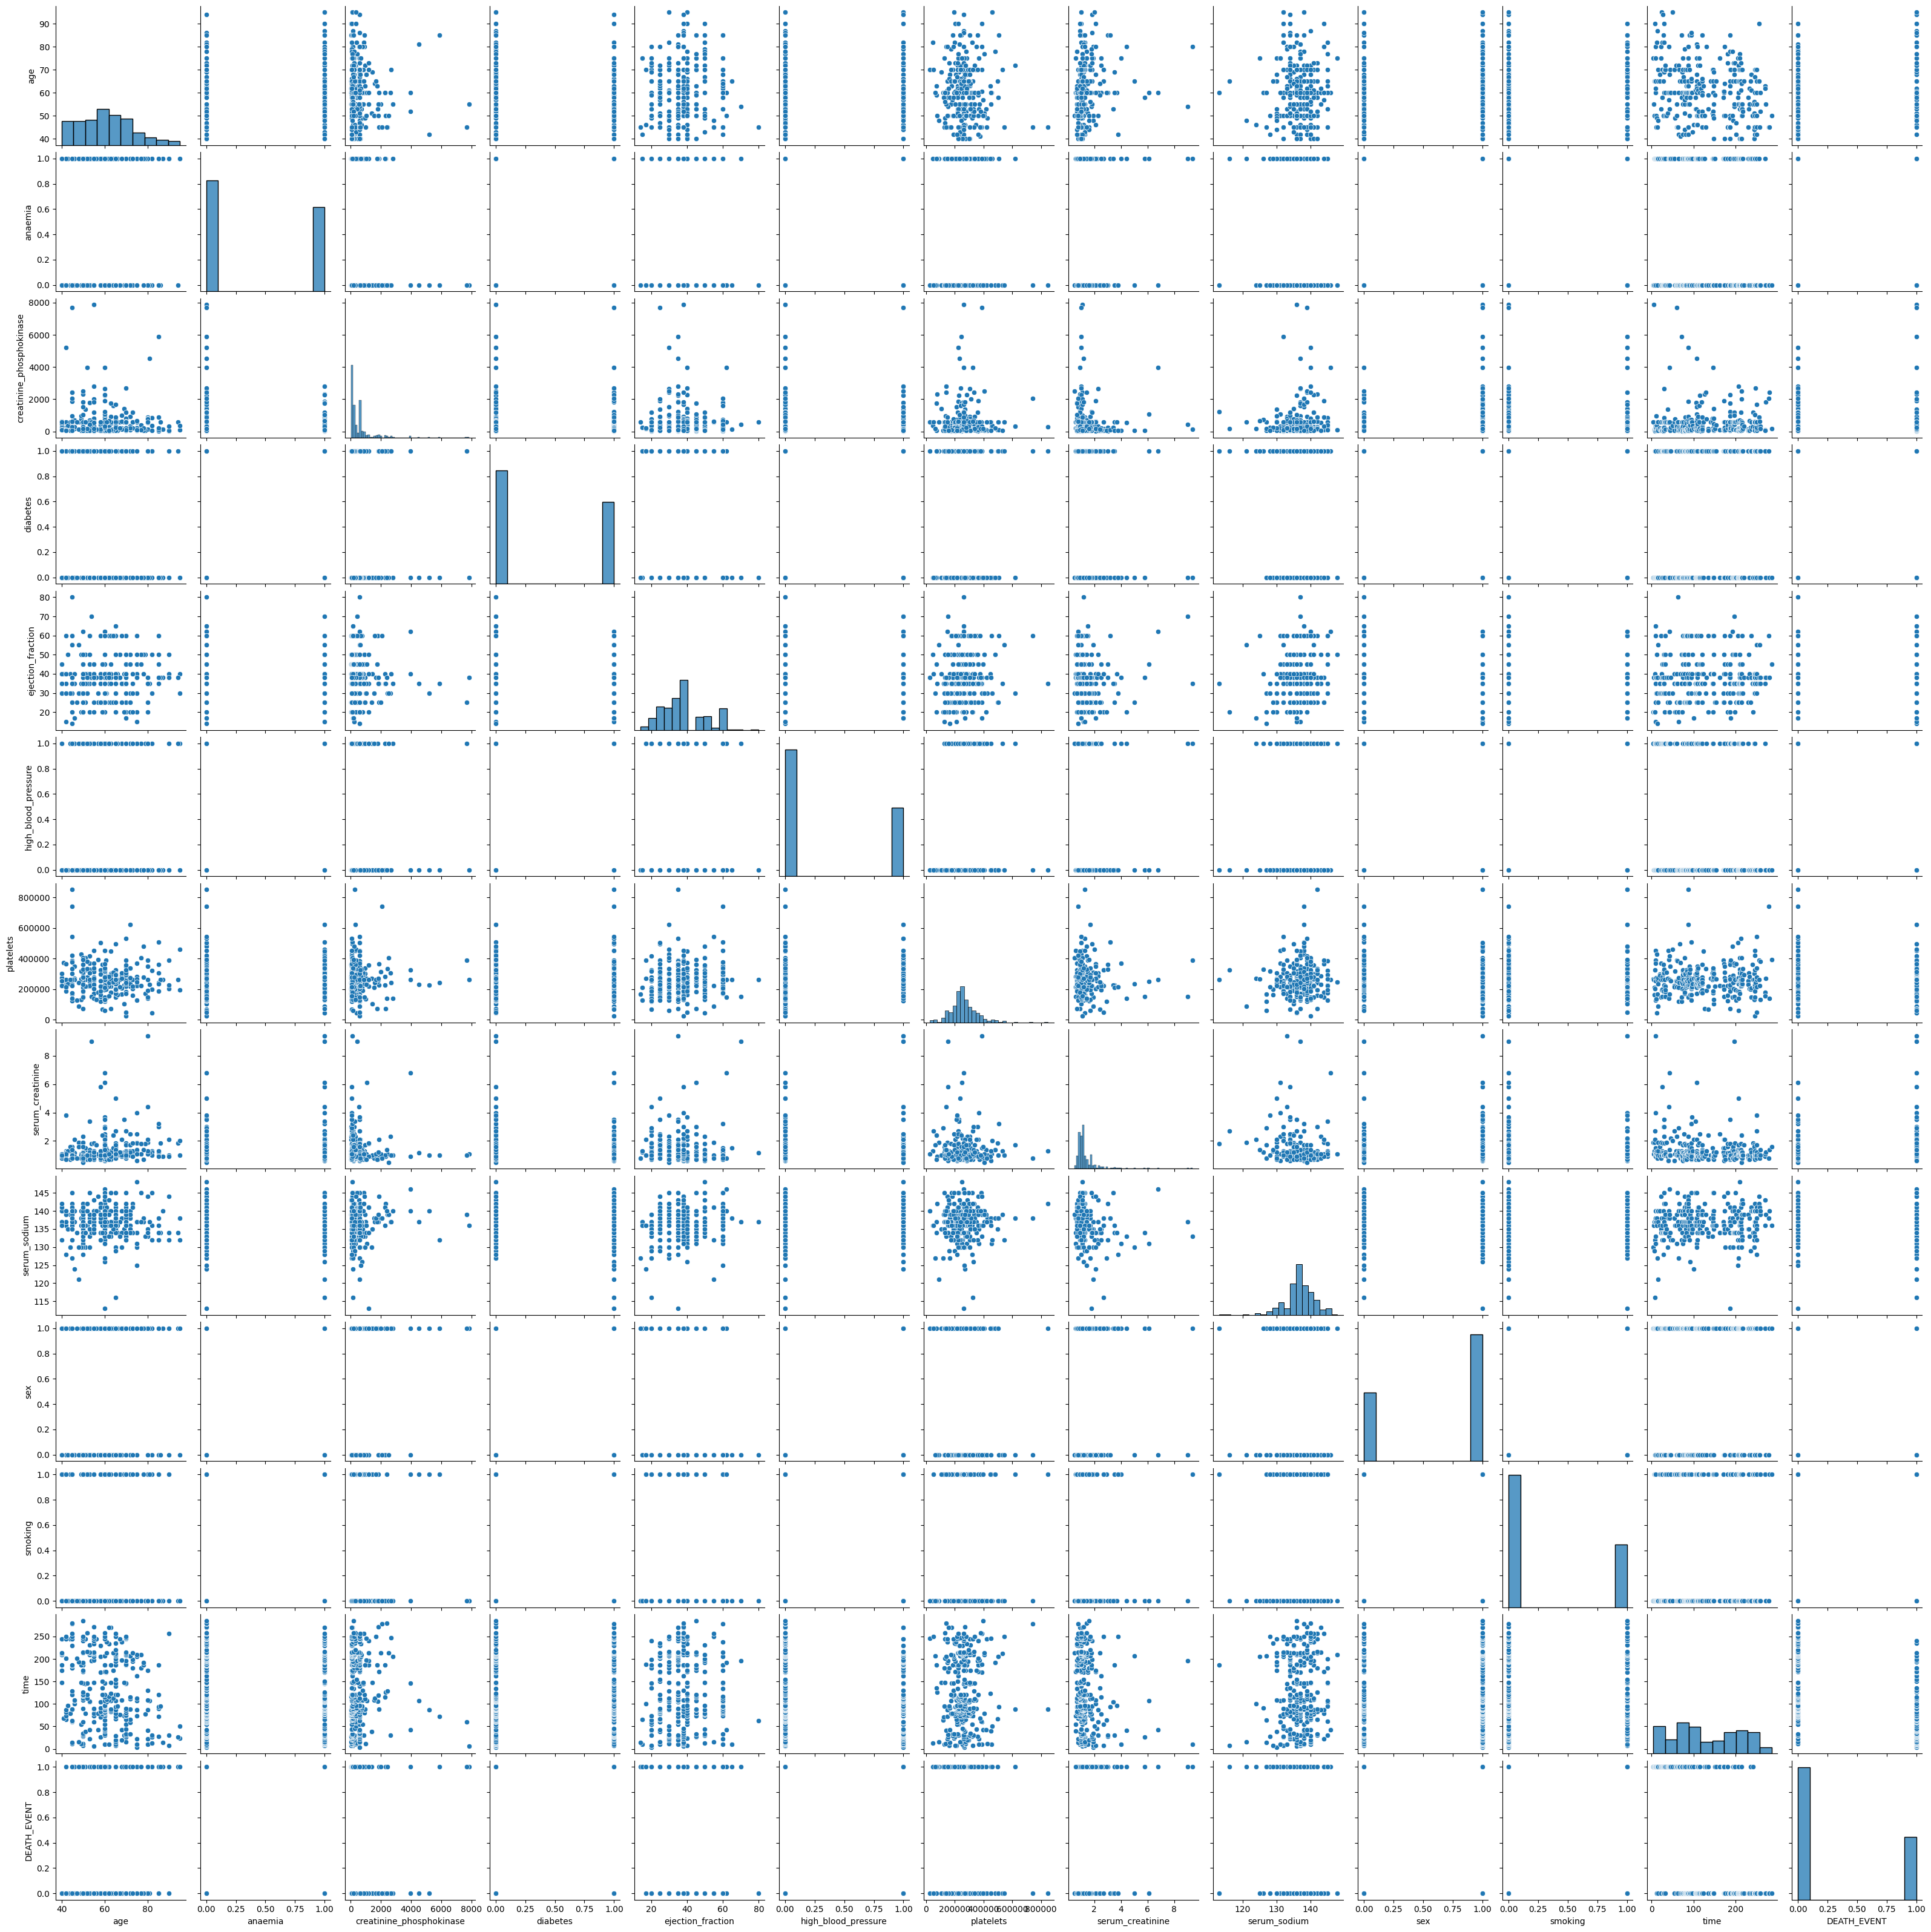

In [ ]:
sns.pairplot(df)

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


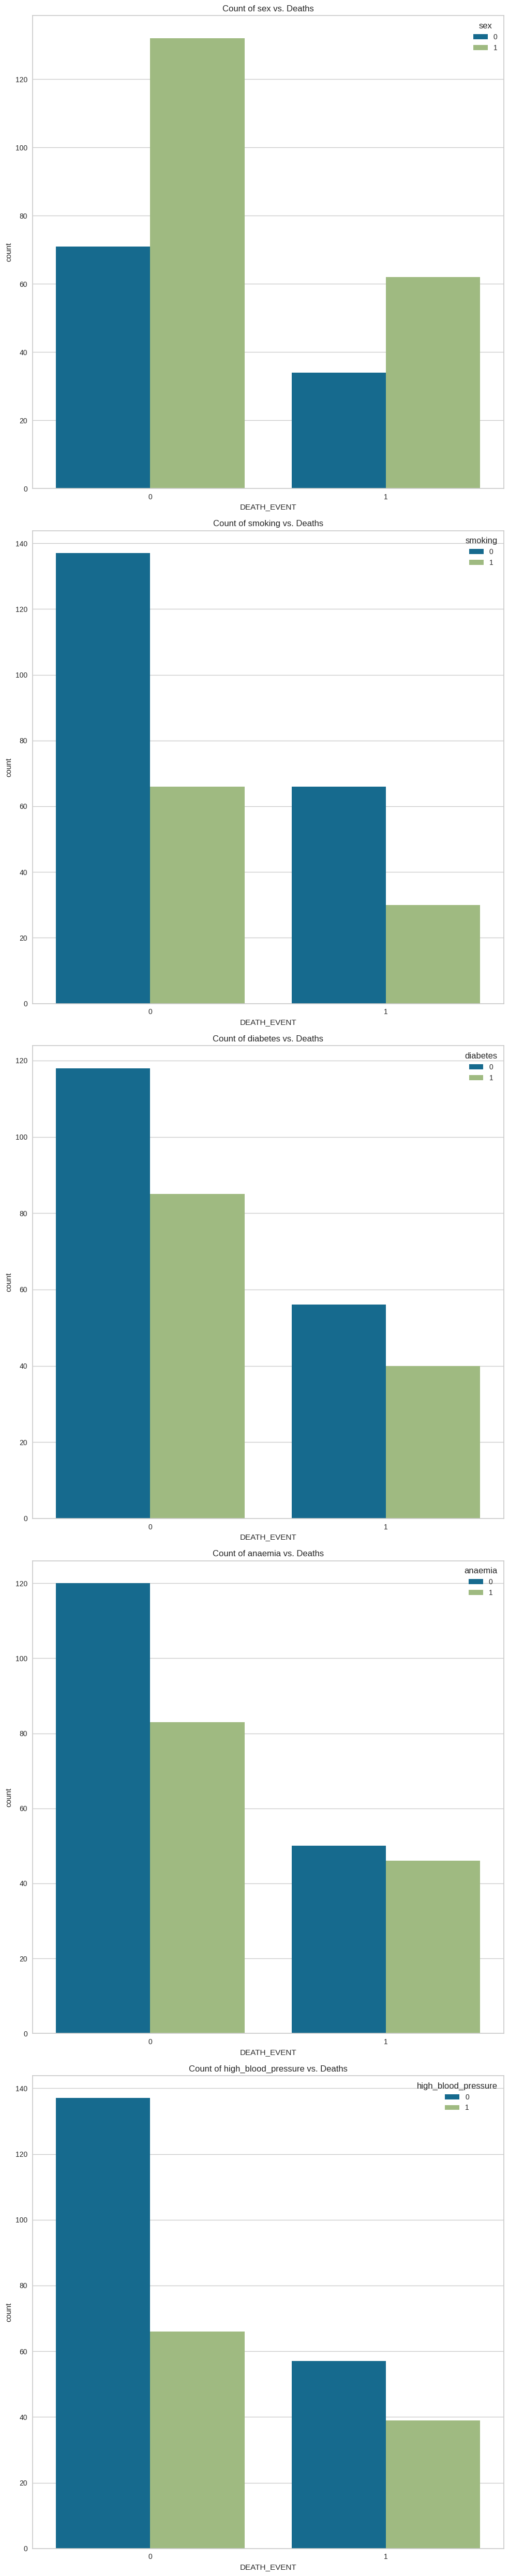

In [57]:
parameters=['sex','smoking','diabetes','anaemia','high_blood_pressure']

fig, axes = plt.subplots(nrows=len(parameters),figsize=(10,10*len(parameters)))

# Iterate over parameters and create count plots
for i, parameter in enumerate(parameters):
    sns.countplot(data=df, x='DEATH_EVENT', hue=parameter, ax=axes[i])
    axes[i].set_title(f'Count of {parameter} vs. Deaths')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# pip install pycaret[full]

In [ ]:
from pycaret.regression import *
s = RegressionExperiment()
s=setup(df, target = 'DEATH_EVENT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,DEATH_EVENT
2,Target type,Regression
3,Original data shape,"(299, 13)"
4,Transformed data shape,"(299, 13)"
5,Transformed train set shape,"(209, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2237,0.1184,0.3354,0.4041,0.2348,0.4082,0.1890
catboost,CatBoost Regressor,0.2287,0.1185,0.3348,0.4021,0.2328,0.4164,1.3220
lightgbm,Light Gradient Boosting Machine,0.2497,0.1202,0.3401,0.3817,0.2461,0.3683,0.5450
rf,Random Forest Regressor,0.2295,0.1321,0.3536,0.3307,0.2465,0.4060,0.1790
gbr,Gradient Boosting Regressor,0.2348,0.1345,0.3567,0.3226,0.2504,0.4247,0.1020
br,Bayesian Ridge,0.3007,0.1365,0.3661,0.2981,0.2591,0.4793,0.0210
huber,Huber Regressor,0.3003,0.1367,0.3658,0.2943,0.2613,0.4976,0.0360
ridge,Ridge Regression,0.3066,0.1403,0.3704,0.2827,0.2673,0.4696,0.0280
lar,Least Angle Regression,0.3069,0.1405,0.3706,0.2817,0.2676,0.4692,0.0220
lr,Linear Regression,0.3069,0.1406,0.3706,0.2816,0.2675,0.4697,0.6170


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

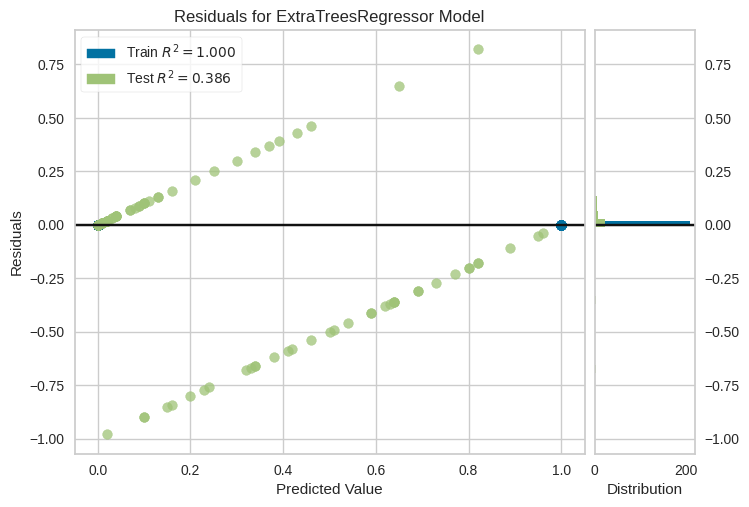

In [ ]:
plot_model(best, plot = 'residuals')

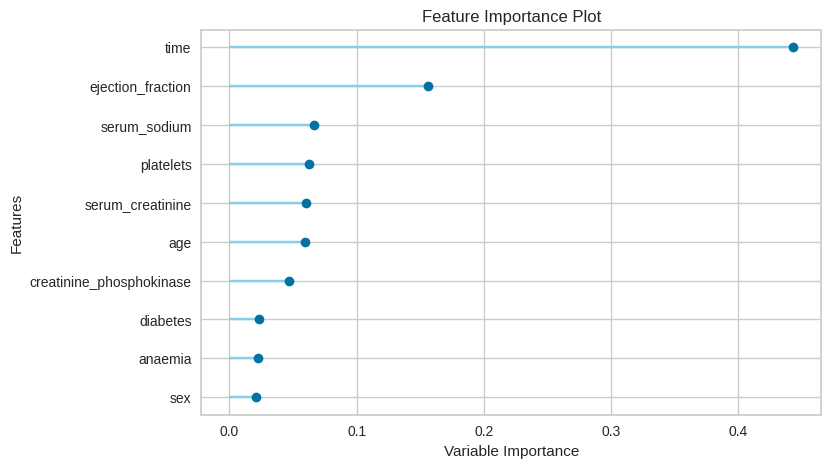

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
rf=create_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2286,0.1152,0.3394,0.4355,0.2326,0.3683
1,0.1414,0.0418,0.2045,0.6584,0.1584,0.2800
2,0.1900,0.0966,0.3109,0.3733,0.2249,0.4925
3,0.1533,0.0652,0.2554,0.6403,0.1599,0.4600
4,0.2119,0.1073,0.3275,0.5699,0.2238,0.3010
5,0.2410,0.1495,0.3867,0.2674,0.2720,0.4267
6,0.1952,0.0794,0.2818,0.6427,0.1955,0.2986
7,0.3248,0.2176,0.4665,0.0206,0.3258,0.4214
8,0.2143,0.1131,0.3364,0.3764,0.2418,0.4520


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
new_data = df.copy()
new_data.drop('DEATH_EVENT', axis=1, inplace=True)
new_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
tuned_model = tune_model(rf)

predictions = predict_model(tuned_model, data=new_data)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3156,0.1361,0.3690,0.3329,0.2591,0.5393
1,0.2440,0.0864,0.2939,0.2946,0.2184,0.5420
2,0.2686,0.1167,0.3416,0.2430,0.2444,0.6275
3,0.2686,0.1141,0.3378,0.3710,0.2292,0.6072
4,0.3419,0.1575,0.3968,0.3688,0.2573,0.5075
5,0.3020,0.1395,0.3735,0.3164,0.2573,0.5737
6,0.2966,0.1212,0.3481,0.4548,0.2412,0.4725
7,0.3891,0.2007,0.4480,0.0970,0.3168,0.5799
8,0.2944,0.1273,0.3567,0.2985,0.2522,0.5815


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predictions['prediction_label']=predictions['prediction_label'].astype(int)

In [ ]:
predictions.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,prediction_label
0,75.0,0,582,0,20,1,265000.00000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03125,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00000,2.7,116,0,0,8,1


In [ ]:
actual_deaths=df['DEATH_EVENT']
predicted_deaths=predictions['prediction_label']

In [ ]:
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
def accuracy_values(x,y):

  conf_matrix = confusion_matrix(x,y)
  print("Confusion Matrix:")
  print(conf_matrix, end='\n\n\n')

  accuracy = accuracy_score(x,y)
  print("Accuracy",accuracy)
  print("Accuracy in Percentage : %.3f%%" % (accuracy*100), end='\n\n\n')


  precision = precision_score(x,y)
  print("Precision:", precision, end='\n\n\n')

  recall = recall_score(x,y)
  print("Recall:", recall, end='\n\n\n')

  f1 = f1_score(x,y)
  print("F1 Score:", f1, end='\n\n\n')

  roc_auc = roc_auc_score(x,y)
  print("ROC AUC Score:", roc_auc, end='\n\n\n')

  return([accuracy,precision,recall,f1,roc_auc])



In [ ]:
metrics=accuracy_values(actual_deaths, predicted_deaths)


Confusion Matrix:
[[203   0]
 [ 37  59]]


Accuracy 0.8762541806020067
Accuracy in Percentage : 87.625%


Precision: 1.0


Recall: 0.6145833333333334


F1 Score: 0.7612903225806451


ROC AUC Score: 0.8072916666666667




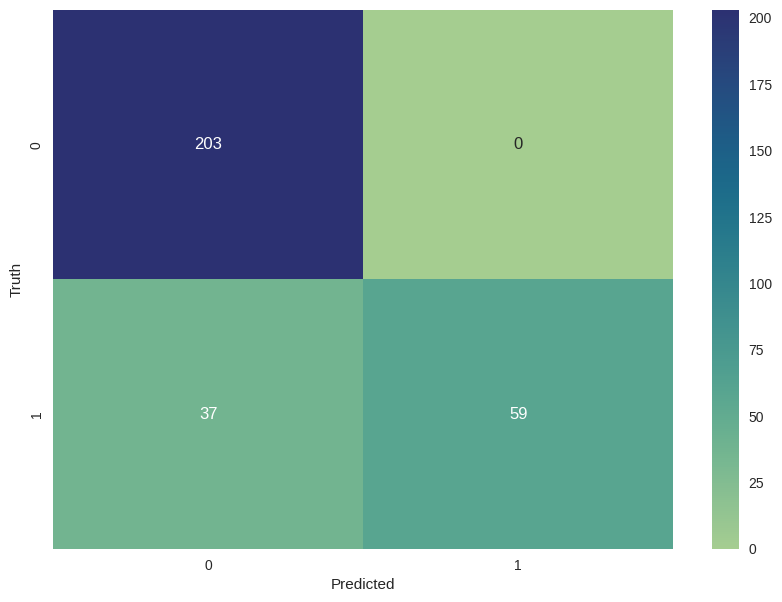

In [ ]:
conf_matrix = confusion_matrix(actual_deaths, predicted_deaths)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,cmap='crest', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
def plot_classification_metrics(x):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']

    values = x

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])

    # Add text labels above the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

    plt.ylabel('Metric Value')
    plt.title('Classification Metrics')
    plt.show()

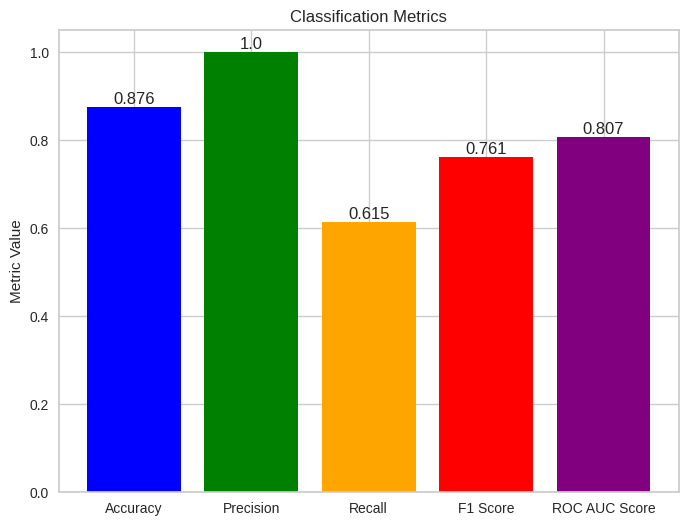

In [ ]:
plot_classification_metrics(metrics)